# Physics 240 
## Intermediate Physics Laboratory
## FINAL EXAM

### Instructions: 
Answer the following questions and typeset your answers within this notebook, 
using a mix of markdown and LaTeX code. Some of your work will likely be done
by hand; for this work, make sure to turn in these calculations, but still put the 
answers in this Jupyter Notebook. 

Follow the steps below and answer the questions as indicated.

In [1]:
## This cell installs custom CSS Cell Styles obtained from 
## Prof. Lorena Barba at https://github.com/barbagroup/AeroPython 
from IPython.core.display import HTML
def css_styling():
    styles = open('styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()

## Step 1: Create a GitHub Repository and make an initial commit.
    a. Create a folder in your Documents folder called LastnameFirstname240FinalExam.
    b. Create a new repository within this folder called 240FinalExam
    c. Save this file into the above folder as LastnameFirstnameAnswers.ipynb 
    d. You should then see an uncommitted change to the 240FinalExam repository; name this "initial commit"
    and publish the changes.
    
For example, if your name was Albert Einstein, you'd create a folder called   
    *EinsteinAlbert240FinalExam*,   
then you would create a new GitHub repository (within this folder) called   
    *240FinalExam*   
and would save this file into the folder 240FinalExam as    
    *EinsteinAlbertFinalAnswers.ipynb*   
and upload the file to your github account. 

Hint: Once you complete steps (a) and (b), you can simply close and halt this notebook (from the Jupyter Notebook file menu, and use your file system browser to drag this file into the folder 240FinalExam. Then this file's existence should show up as as an uncommitted change which you can publish (after first labelling it as the initial commit, of course). 

All of the above may be easily done by using a GitHub Gui Client available for OSX, Linux, and Windoze at:
https://github.com/gitterHQ/desktop

For the following questions, I encourage you to make and publish a new commit after you finish each question.


# Question 1
## Statistical Uncertainty with dropped velociraptors

<img src="Velociraptor.jpg" width=150 height=150>

A velociraptor is dropped from a height of 10.0 $\pm$ 0.1 meters and the fall time   
is measured to the nearest 0.01 seconds. This *experiment* is performed a dozen times with the following drop times in seconds obtained:   
1.22, 1.39, 1.55, 1.43, 1.11, 1.64, 1.44, 1.33, 1.55, 1.49, 1.47, 1.35   
Calculate the mean value of the drop time and the root mean square uncertainty, $\Delta t_{rms}$. You may use python or---if you like suffering---your calculator. 

### Solution method :

The drop time will be dependant on the height, so the 10.0 $\pm$ 0.1 m is important. Simple kinematics (ignoring air resistance) gives

$x_f = x_i + v_i t + \frac{1}{2} a t^2$

This equation will be useful later. The mean of the times to be calculated will be relatively simple, such

$t_{mean} = \frac{\sum_i^{12} t_i}{12}$

The rms error will also be fairly simple, with

$\Delta t_{rms} = \sqrt{\frac{\sum_i^{12}(t_i-t_{mean})^2}{12}}$




### This text was written above, before I realized what the question was actually asking. I am leaving this in for futher use.

We can then solve for t, getting a quadratic, which gives:

$t = \frac{-v_i \pm \sqrt{v_i^2 -4(\frac{a}{2})(x_i-x_f)}}{2(\frac{a}{2})}$

With $v_i = 0$, $x_f = 0$, $x_i = 10.0$, and $a=-9.8$, that gives:

$t =\frac{ \pm \sqrt{2(9.8)(10.0)}}{9.8}$

The negative root can be dropped, leaving us with:

$t = \frac{\sqrt{2(9.8)(10.0)}}{9.8} = 1.42$ seconds.

This value is the theoretical time it should take velociraptor to fall.

We then can determine the mean time it took for the raptors to fall. From calculations below, this is 1.414 seconds.

In [20]:
# Place any python code needed here.
import numpy as np
import matplotlib.pyplot as plt

#calculations

theoreticalT = np.sqrt(2*9.8*10)/(9.8)
print(theoreticalT)


#data

dropTimes = [1.22, 1.39, 1.55, 1.43, 1.11, 1.64, 1.44, 1.33, 1.55, 1.49, 1.47, 1.35]
meanDropTime = np.mean(dropTimes)
print(meanDropTime)

rmsErrorSum = 0
for i in range(len(dropTimes)):
    rmsErrorSum += (dropTimes[i]-meanDropTime)**2
rmsError = np.sqrt((1/len(dropTimes))*rmsErrorSum)
print(rmsError)

1.42857142857
1.41416666667
0.141330483462


### Question 1 Answer

Mean time = 1.414 seconds   

$\Delta t_{rms}$ = 0.141 seconds

# Question 2
## Error Propagation; measuring g via dropped velociraptors

Suppose you assume that the velociraptor drop experiment was used to determine the acceleration due to gravity. Using your knowledge of basic kinematics (and assuming
no air resistance), calculate the experimental value of $g$ that you should report for this data.

### Solution Method:

From above

$x_f = x_i + v_i t + \frac{1}{2} g t^2$

With $v_i = 0$, $x_f = 0$, and $x_i = 10.0$, that gives:

$0 = (10.0 \pm 0.1) + \frac{1}{2} g (t\pm \Delta t)^2$

Solving for $g$ gives:

$g = \frac{-2(10.0 \pm 0.1)}{(t_{mean}\pm \Delta t_{rms})^2}$

To get our mean value for g we just take the mean values for x and t, or that

$g_{mean} = \frac{-2x_i}{t_{mean}^2} = -10.0 \frac{m}{s^2}$

To calculate the uncertainty in g we use

$\Delta g = \sqrt{(\frac{\partial g}{\partial x_i} * \Delta x_i)^2 + (\frac{\partial g}{\partial t} * \Delta t)^2}$

With

$\frac{\partial g}{\partial x_i} = \frac{-2}{t^2}$

and 

$\frac{\partial g}{\partial t} = \frac{4x_i}{t^3}$

We can finally get a series of uncertainties for g for each drop. We then can average or take the maximum value as our uncertainty.

From the calculations below, most of the uncertainties lie around $2 \frac{m}{s^2}$, which would lead to me to take the uncertainty to be around that point. This uncertianty also encompasses the actual value of g.

In [26]:
# This cell is for any needed python code. 

#calculate mean value for g
meanG = (-2*(10.0))/(meanDropTime)**2
print(meanG)

#calculate uncertainty in g
deltaG = []
for i in range(len(dropTimes)):
    deltaG.append(np.sqrt( (((-2)/(dropTimes[i])**2)*(0.1))**2 + (((4*10.0)/(dropTimes[i])**3)*(rmsError))**2))
    
print(deltaG)
print("Average uncertainty is ",np.mean(deltaG))
print("Maximum uncertainty is ",max(deltaG))

-10.0006632384
[3.1161653181457143, 2.1075404248826191, 1.5203820053817714, 1.9357210954314052, 4.1367712427677379, 1.2837901887317689, 1.895706936735063, 2.4055873922172211, 1.5203820053817714, 1.7113529185633256, 1.7820928807809646, 2.3003254867219645]
Average uncertainty is  2.14298482465
Maximum uncertainty is  4.13677124277


### Question 2 Answer

g = -10.0 $\pm$ 2.1

# Question 3
## Determining g with a point mass pendulum via plotting

Suppose that you measure the period of a simple pendulum as a function of length   
and obtain the following data:   

Period Values ($\pm 0.1$ s) =  0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50.   
Length $(\pm 0.03)$ m =  0.010,  0.025, 0.070,  0.10,  0.140, 0.230, 0.310, 0.350, 0.500   

Knowing that the period of a simple pendulum is   
$\displaystyle T = 2π\sqrt{\frac{L}{g}}$   
and use an appropriate graph, such that the plot:   

    a. gives a straight line whose slope   
       directly gives the value of g   
    b. shows data points with error bars   
    c. includes axes labels and units   
    d. includes a best fit line to the data.   

Note that you might not be on the earth when conducting this experiment.


### Solution method:


From the above equation we can get

$ L = g \frac{T^2}{4\pi^2} $

This shows that if we plot L as a function of $\frac{T^2}{4\pi^2}$ we should get a slope of g.


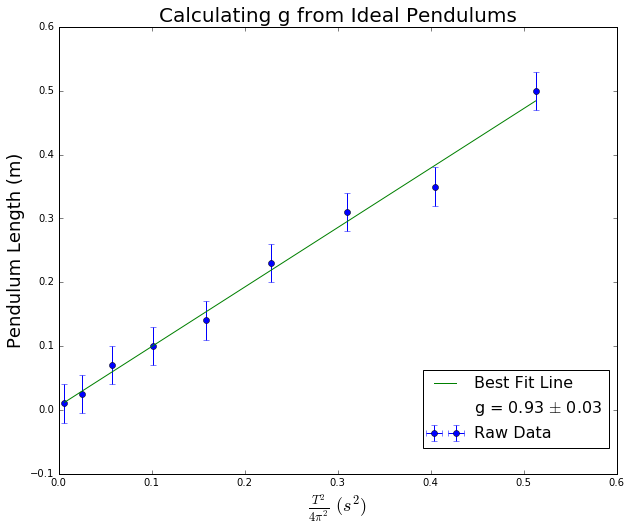

In [50]:
# place your python code here. Make sure your plot has axes labels with units!
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linFit (x, m, b):
    return m*x + b

%matplotlib inline

#data
rawPeriod = [0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50]
rawPeriod = np.array(rawPeriod)
modPeriod = (rawPeriod**2)/(4*np.pi**2)
modPeriodError = (0.1**2)/(4*np.pi**2)

length = [0.010,  0.025, 0.070,  0.10,  0.140, 0.230, 0.310, 0.350, 0.500]
length = np.array(length)
lengthError = 0.03

#calculate best fit line
fitParams, fitCovar = curve_fit(linFit, modPeriod, length)
sigma = np.sqrt([fitCovar[0,0], fitCovar[1,1]])
x = np.linspace(min(modPeriod), max(modPeriod), 1000)

#graph plotting
plt.figure(figsize=(10,8))
plt.title("Calculating g from Ideal Pendulums", fontsize = 20)
plt.errorbar(modPeriod, length, fmt='o', xerr = modPeriodError, yerr = lengthError, label = "Raw Data")
plt.plot(x, linFit(x, fitParams[0], fitParams[1]), label = "Best Fit Line")
plt.plot(0,0, color='w', label = "g = %0.2f $\pm$ %0.2f"%(fitParams[0], sigma[0]))
plt.ylabel("Pendulum Length (m)", fontsize=18)
plt.xlabel(r"$\frac{T^2}{4\pi^2}$ $(s^2)$", fontsize = 18)
plt.legend(bbox_to_anchor = (1,0.25), fontsize=16)
plt.show()


### Question 3 Answer

g $\pm\;\Delta$ g = _______ $\pm$

# Final Step for online portion
## Final steps, then move on to written portion

Now make sure to commit your changes to your master copy, but before doing so, place a link to your repository in the next cell.   

Repository Link = 